In [70]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('fft_data1.csv')
del df['Unnamed: 0']
df.columns

Index(['Amplitude', 'Frequency'], dtype='object')

<AxesSubplot:xlabel='Frequency', ylabel='Amplitude'>

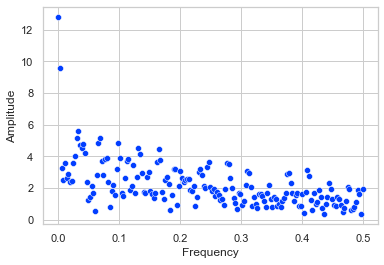

In [51]:
sns.scatterplot(df.Frequency,df.Amplitude)

In [52]:
df

,Amplitude,Frequency
0,12.814013,0.000000
1,9.547197,0.002740
2,3.262728,0.005479
3,2.508010,0.008219
4,3.605442,0.010959
...,...,...
178,1.110596,0.487671
179,1.853265,0.490411
180,1.603199,0.493151
181,0.332881,0.495890


In [53]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(df)
        bic.append(gmm.bic(df))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm10 = gmm

In [54]:
best_gmm10.weights_

array([0.4910708 , 0.3820892 , 0.01092897, 0.11591102])

In [55]:
x,y=best_gmm10.sample(183)
amp=[]
freq=[]
for i in range(x.shape[0]):
    amp.append(x[i][0])
    freq.append(x[i][1])

<AxesSubplot:>

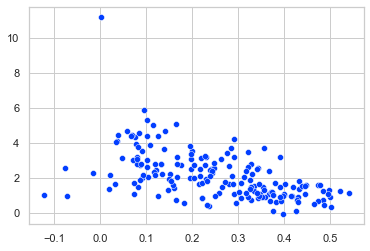

In [56]:
sns.scatterplot(freq,amp)

<AxesSubplot:xlabel='Frequency', ylabel='Amplitude'>

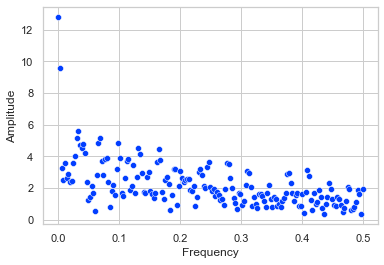

In [57]:
sns.scatterplot(df.Frequency,df.Amplitude)

In [58]:
best_gmm10.get_params()

{'covariance_type': 'diag',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [59]:
best_gmm10.covariances_

array([[6.03842887e-01, 9.91268222e-03],
       [2.25428781e-01, 4.94139082e-03],
       [2.66807309e+00, 2.87653722e-06],
       [4.75480145e-01, 1.84935345e-03]])

In [81]:
def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = matplotlib.patches.Ellipse(gmm.means_[n], v[0], v[1],
                                  180 + angle, color=plt.cm.tab10(n))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)


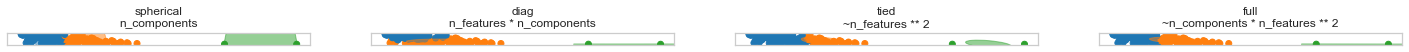

In [83]:
X = x
from sklearn.mixture import GaussianMixture
# Try GMMs using different types of covariances.
estimators = [GaussianMixture(n_components=3, covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']]

n_estimators = len(estimators)

fig, axes = plt.subplots(1, 4, figsize=(25, 15))
titles = ("spherical\nn_components", "diag\nn_features * n_components",
          "tied\n~n_features ** 2", "full\n~n_components * n_features ** 2")

for ax, title, estimator in zip(axes, titles, estimators):
    estimator.fit(X)

    make_ellipses(estimator, ax)

    pred = estimator.predict(X)    
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(pred))

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_aspect("equal")

In [72]:
rnd = np.random.RandomState(4)
X1 = rnd.normal(size=(50, 2)) + rnd.normal(scale=10, size=(1, 2))
X2 = rnd.normal(scale=(1, 5), size=(50, 2)) + rnd.normal(scale=(10, 1), size=(1, 2))
X3 = np.dot(rnd.normal(scale=(1, 2), size=(50, 2)), [[1, -1], [1, 1]]) + rnd.normal(scale=(10, 1), size=(1, 2))

X = np.vstack([X1, X2, X3])

In [73]:
X

array([[ 7.43303282,  7.00748364],
       [ 6.38656218,  7.20113082],
       [ 6.96416959,  4.92295508],
       [ 6.73476435,  7.10610748],
       [ 7.71472115,  5.36005568],
       [ 8.0011408 ,  6.41954538],
       [ 7.80754351,  6.83978546],
       [ 6.22565485,  6.85852946],
       [ 6.77558383,  8.05451164],
       [ 8.10581272,  6.55366788],
       [ 6.39947946,  6.56196505],
       [ 7.54236405,  5.29858415],
       [ 9.60583133,  6.90182752],
       [ 9.07482883,  5.39472016],
       [ 9.01821865,  5.14656672],
       [ 6.73124528,  7.04998362],
       [ 7.43047736,  4.14945868],
       [ 6.27688707,  7.34536866],
       [ 9.47034198,  7.42237327],
       [ 7.10626776,  7.30404421],
       [ 6.23867254,  7.01745209],
       [ 6.03501082,  6.49817221],
       [ 7.25176647,  7.30961892],
       [ 7.07950715,  7.7095349 ],
       [ 7.18572583,  7.34406101],
       [ 8.1690734 ,  4.66665644],
       [ 7.4200186 ,  6.54346036],
       [ 6.60373119,  6.68694302],
       [ 5.92693679,

In [75]:
x = np.asarray(df)
x

array([[1.28140129e+01, 0.00000000e+00],
       [9.54719672e+00, 2.73972603e-03],
       [3.26272780e+00, 5.47945205e-03],
       [2.50800951e+00, 8.21917808e-03],
       [3.60544163e+00, 1.09589041e-02],
       [2.63812585e+00, 1.36986301e-02],
       [2.87809121e+00, 1.64383562e-02],
       [2.39391603e+00, 1.91780822e-02],
       [2.44687324e+00, 2.19178082e-02],
       [3.55242830e+00, 2.46575342e-02],
       [3.99194686e+00, 2.73972603e-02],
       [5.18346155e+00, 3.01369863e-02],
       [5.58607457e+00, 3.28767123e-02],
       [4.72312072e+00, 3.56164384e-02],
       [4.55432681e+00, 3.83561644e-02],
       [4.80507331e+00, 4.10958904e-02],
       [4.24206578e+00, 4.38356164e-02],
       [2.37344330e+00, 4.65753425e-02],
       [1.25740773e+00, 4.93150685e-02],
       [1.43658621e+00, 5.20547945e-02],
       [2.10881119e+00, 5.47945205e-02],
       [1.70817360e+00, 5.75342466e-02],
       [5.65444715e-01, 6.02739726e-02],
       [2.83247768e+00, 6.30136986e-02],
       [4.851977